In \[1\]:

    from azureml.opendatasets import Diabetes
    import numpy as np
    import pandas as pd
    import matplotlib.pyplot as plt
    import seaborn as sns
    import matplotlib.ticker
    import matplotlib as m
    %matplotlib inline
    import warnings
    warnings.filterwarnings("ignore")
    matplotlib.rcParams['figure.figsize'] = (10, 6)

In \[2\]:

    print("pandas version",pd.__version__)
    print("Numpy version",np.__version__)
    print("Seaborn version",sns.__version__)
    print("Matplotlib version",m.__version__)

    pandas version 1.0.0
    Numpy version 1.19.0
    Seaborn version 0.11.1
    Matplotlib version 3.2.2

In \[3\]:

    diabetes = Diabetes.get_tabular_dataset()
    diabetes_df = diabetes.to_pandas_dataframe()

In \[4\]:

    print("total no.of rows and columns:",diabetes_df.shape)
    print("total size:",diabetes_df.size)

    total no.of rows and columns: (442, 11)
    total size: 4862

In \[5\]:

    diabetes_df.plot(kind='box',subplots='true',layout=(5,5),figsize=(10,10))
    plt.show()

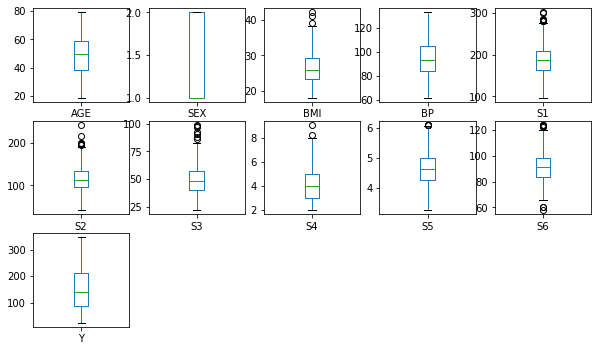

In \[6\]:

    diabetes_df.head()

Out\[6\]:

|     | AGE | SEX | BMI  | BP    | S1  | S2    | S3   | S4  | S5     | S6  | Y   |
|-----|-----|-----|------|-------|-----|-------|------|-----|--------|-----|-----|
| 0   | 59  | 2   | 32.1 | 101.0 | 157 | 93.2  | 38.0 | 4.0 | 4.8598 | 87  | 151 |
| 1   | 48  | 1   | 21.6 | 87.0  | 183 | 103.2 | 70.0 | 3.0 | 3.8918 | 69  | 75  |
| 2   | 72  | 2   | 30.5 | 93.0  | 156 | 93.6  | 41.0 | 4.0 | 4.6728 | 85  | 141 |
| 3   | 24  | 1   | 25.3 | 84.0  | 198 | 131.4 | 40.0 | 5.0 | 4.8903 | 89  | 206 |
| 4   | 50  | 1   | 23.0 | 101.0 | 192 | 125.4 | 52.0 | 4.0 | 4.2905 | 80  | 135 |

In \[7\]:

    diabetes_df.describe()

Out\[7\]:

|       | AGE        | SEX        | BMI        | BP         | S1         | S2         | S3         | S4         | S5         | S6         | Y          |
|-------|------------|------------|------------|------------|------------|------------|------------|------------|------------|------------|------------|
| count | 442.000000 | 442.000000 | 442.000000 | 442.000000 | 442.000000 | 442.000000 | 442.000000 | 442.000000 | 442.000000 | 442.000000 | 442.000000 |
| mean  | 48.518100  | 1.468326   | 26.375792  | 94.647014  | 189.140271 | 115.439140 | 49.788462  | 4.070249   | 4.641411   | 91.260181  | 152.133484 |
| std   | 13.109028  | 0.499561   | 4.418122   | 13.831283  | 34.608052  | 30.413081  | 12.934202  | 1.290450   | 0.522391   | 11.496335  | 77.093005  |
| min   | 19.000000  | 1.000000   | 18.000000  | 62.000000  | 97.000000  | 41.600000  | 22.000000  | 2.000000   | 3.258100   | 58.000000  | 25.000000  |
| 25%   | 38.250000  | 1.000000   | 23.200000  | 84.000000  | 164.250000 | 96.050000  | 40.250000  | 3.000000   | 4.276700   | 83.250000  | 87.000000  |
| 50%   | 50.000000  | 1.000000   | 25.700000  | 93.000000  | 186.000000 | 113.000000 | 48.000000  | 4.000000   | 4.620050   | 91.000000  | 140.500000 |
| 75%   | 59.000000  | 2.000000   | 29.275000  | 105.000000 | 209.750000 | 134.500000 | 57.750000  | 5.000000   | 4.997200   | 98.000000  | 211.500000 |
| max   | 79.000000  | 2.000000   | 42.200000  | 133.000000 | 301.000000 | 242.400000 | 99.000000  | 9.090000   | 6.107000   | 124.000000 | 346.000000 |

In \[8\]:

    def Diabetic(S6):
      if  0<= S6 <= 69:
        return "Hypoglycemia"
      elif 70 <= S6 <= 99 :
        return "Normal "
      elif 100 <= S6 <= 125 :
        return "Pre-diabetes "
      elif 126<= S6 <= 300:
        return "Diabetic"

    diabetes_df['Diabetic'] = diabetes_df['S6'].apply(lambda x: Diabetic(x))

In \[9\]:

    def Diabetic_progression(Y): 
     if  0<= Y <= 69 :
        return "Hypoglycemia"
     elif 70 <= Y <= 99 :
        return "Normal "
     elif 100 <= Y <= 125 :
        return "Pre-diabetes "
     elif 126<= Y <= 400:
        return "Diabetic"
    diabetes_df['Diabetic_progression'] = diabetes_df['Y'].apply(lambda x: Diabetic_progression(x))

In \[10\]:

    class_names = diabetes_df['Diabetic_progression'].unique()

In \[11\]:

    diabetes_df.info()

    <class 'pandas.core.frame.DataFrame'>
    RangeIndex: 442 entries, 0 to 441
    Data columns (total 13 columns):
     #   Column                Non-Null Count  Dtype  
    ---  ------                --------------  -----  
     0   AGE                   442 non-null    int64  
     1   SEX                   442 non-null    int64  
     2   BMI                   442 non-null    float64
     3   BP                    442 non-null    float64
     4   S1                    442 non-null    int64  
     5   S2                    442 non-null    float64
     6   S3                    442 non-null    float64
     7   S4                    442 non-null    float64
     8   S5                    442 non-null    float64
     9   S6                    442 non-null    int64  
     10  Y                     442 non-null    int64  
     11  Diabetic              442 non-null    object 
     12  Diabetic_progression  442 non-null    object 
    dtypes: float64(6), int64(5), object(2)
    memory usage: 45.0+ KB

In \[12\]:

    diabetes_df.head()

Out\[12\]:

|     | AGE | SEX | BMI  | BP    | S1  | S2    | S3   | S4  | S5     | S6  | Y   | Diabetic     | Diabetic_progression |
|-----|-----|-----|------|-------|-----|-------|------|-----|--------|-----|-----|--------------|----------------------|
| 0   | 59  | 2   | 32.1 | 101.0 | 157 | 93.2  | 38.0 | 4.0 | 4.8598 | 87  | 151 | Normal       | Diabetic             |
| 1   | 48  | 1   | 21.6 | 87.0  | 183 | 103.2 | 70.0 | 3.0 | 3.8918 | 69  | 75  | Hypoglycemia | Normal               |
| 2   | 72  | 2   | 30.5 | 93.0  | 156 | 93.6  | 41.0 | 4.0 | 4.6728 | 85  | 141 | Normal       | Diabetic             |
| 3   | 24  | 1   | 25.3 | 84.0  | 198 | 131.4 | 40.0 | 5.0 | 4.8903 | 89  | 206 | Normal       | Diabetic             |
| 4   | 50  | 1   | 23.0 | 101.0 | 192 | 125.4 | 52.0 | 4.0 | 4.2905 | 80  | 135 | Normal       | Diabetic             |

**AGE DISTRIBUTION**

In \[13\]:

    plt.figure(figsize=(10,6))
    sns.countplot(diabetes_df.AGE)
    plt.xticks(rotation=90)
    plt.title("Age distribution")

Out\[13\]:

    Text(0.5, 1.0, 'Age distribution')

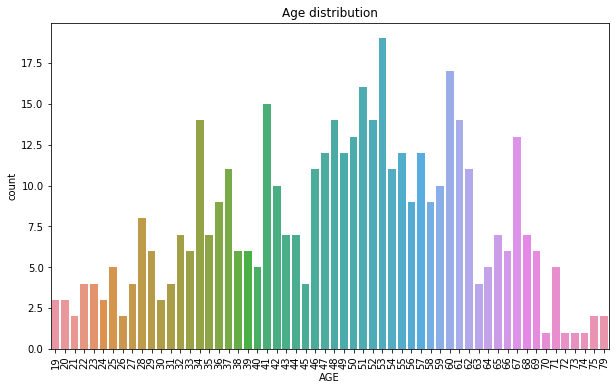

In \[14\]:

    def Age_group(AGE):
      if 0 < AGE <= 2:
        return "Infants"
      elif 2 < AGE <= 5:
        return "Pre School Child"
      elif 5 < AGE <= 12:
        return "Child"
      elif 12 < AGE <= 19:
        return "Adolescent"
      elif 19 < AGE <= 24:
        return "Young Adult"
      elif 24 < AGE <= 44:
        return "Adult"
      elif 44 < AGE <= 65:
        return "Middle Aged"
      elif 65 < AGE:
        return "Aged"
    diabetes_df['Age_group'] = diabetes_df['AGE'].apply(lambda x: Age_group(x))

In \[15\]:

    sns.countplot(x ='Age_group', data = diabetes_df)
    plt.ylabel("No.of patients")
    plt.title("Total patients recorded in each group")

Out\[15\]:

    Text(0.5, 1.0, 'Total patients recorded in each group')

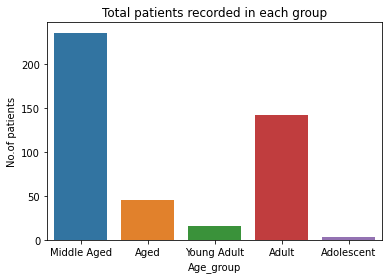

In \[16\]:

    pd.crosstab(diabetes_df['Age_group'],diabetes_df['Diabetic_progression'])

Out\[16\]:

| Diabetic_progression | Diabetic | Hypoglycemia | Normal | Pre-diabetes |
|----------------------|----------|--------------|--------|--------------|
| Age_group            |          |              |        |              |
| Adolescent           | 3        | 0            | 0      | 0            |
| Adult                | 68       | 35           | 24     | 15           |
| Aged                 | 31       | 2            | 8      | 4            |
| Middle Aged          | 141      | 31           | 40     | 24           |
| Young Adult          | 7        | 1            | 6      | 2            |

In \[17\]:

    sns.countplot(x ='Age_group',hue = 'Diabetic_progression', data = diabetes_df)
    plt.ylabel("No.of patients")
    plt.title("Age group mostly effected with diabetes")

Out\[17\]:

    Text(0.5, 1.0, 'Age group mostly effected with diabetes')

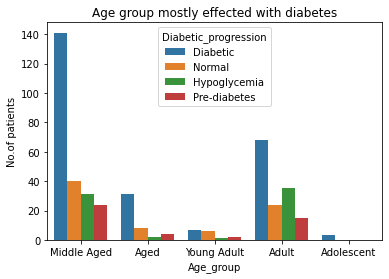

In \[18\]:

    pd.crosstab(diabetes_df['Diabetic'],diabetes_df['Diabetic_progression'])

Out\[18\]:

| Diabetic_progression | Diabetic | Hypoglycemia | Normal | Pre-diabetes |
|----------------------|----------|--------------|--------|--------------|
| Diabetic             |          |              |        |              |
| Hypoglycemia         | 2        | 2            | 5      | 2            |
| Normal               | 174      | 64           | 64     | 35           |
| Pre-diabetes         | 74       | 3            | 9      | 8            |

In \[19\]:

    sns.displot(diabetes_df, x="Diabetic", hue="Diabetic_progression", multiple="stack")
    plt.ylabel("No.of patients")
    plt.title("Disease progression over 1year")

Out\[19\]:

    Text(0.5, 1.0, 'Disease progression over 1year')

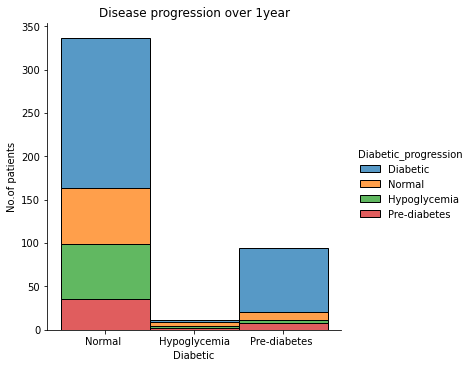

In \[20\]:

    colors = ['tab:blue', 'tab:pink', 'tab:red', 'tab:green']
    plt.pie(diabetes_df.Diabetic_progression.value_counts(),explode=[0.1,0.1,0.1,0.1],colors = colors,labels=['Diabetic', 'Low sugar level', 'Normal','Pre-diabetic'],autopct='%.1f%%',shadow=True)
    plt.axis('equal')
    plt.title('Data composition')
    plt.show()

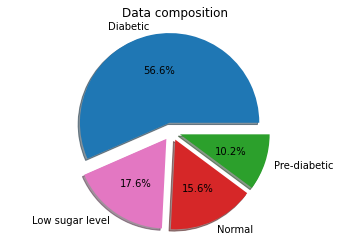

!!!!**GENDER DISTRIBUTION**

In \[21\]:

    pd.crosstab(diabetes_df['SEX'],diabetes_df['Diabetic_progression'])

Out\[21\]:

| Diabetic_progression | Diabetic | Hypoglycemia | Normal | Pre-diabetes |
|----------------------|----------|--------------|--------|--------------|
| SEX                  |          |              |        |              |
| 1                    | 132      | 40           | 44     | 19           |
| 2                    | 118      | 29           | 34     | 26           |

In \[22\]:

    pd.crosstab(diabetes_df['SEX'],diabetes_df['Diabetic_progression']).plot(kind="barh",figsize=(8,6),color=['#7AD7F0','#DBF3FA','#92DFF3','#B7E9F7' ])
    plt.title("Gender that got  mostly effected with diabetes")

Out\[22\]:

    Text(0.5, 1.0, 'Gender that got  mostly effected with diabetes')

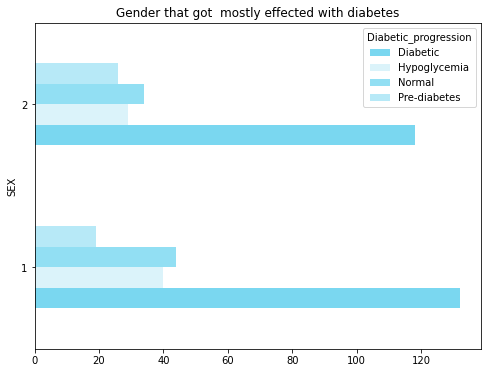

In \[23\]:

    pd.crosstab(diabetes_df['SEX'],diabetes_df['Age_group']).plot(kind="barh",figsize=(8,6))
    plt.title("which Age group of both males and females are diabetic?")

Out\[23\]:

    Text(0.5, 1.0, 'which Age group of both males and females are diabetic?')

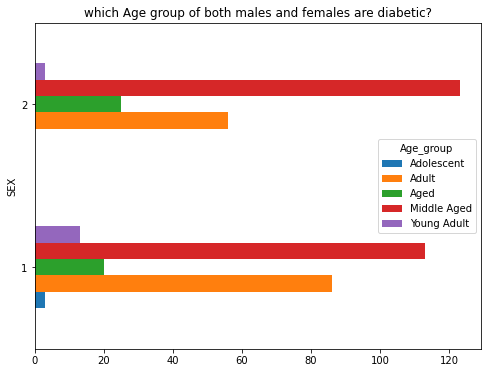

In \[24\]:

    diabetes_df['Diabetic_progression'].value_counts()

Out\[24\]:

    Diabetic         250
    Normal            78
    Hypoglycemia      69
    Pre-diabetes      45
    Name: Diabetic_progression, dtype: int64

In \[25\]:

    diabetes_df['Diabetic'].value_counts()

Out\[25\]:

    Normal           337
    Pre-diabetes      94
    Hypoglycemia      11
    Name: Diabetic, dtype: int64

In \[26\]:

    diabetes_df['Diabetic_progression'] = diabetes_df['Diabetic_progression'].astype("|S")
    diabetes_df['Diabetic'] = diabetes_df['Diabetic'].astype("|S")

**CONVERTING CATEGORICAL DATA INTO NUMERICAL DATA**

In \[27\]:

    from sklearn import preprocessing  
    label_encoder = preprocessing.LabelEncoder() 
    diabetes_df['Diabetic_progression']= label_encoder.fit_transform(diabetes_df['Diabetic_progression']) 
    diabetes_df['Diabetic_progression'].unique()

Out\[27\]:

    array([0, 2, 1, 3])

In \[28\]:

    from sklearn import preprocessing  
    label_encoder = preprocessing.LabelEncoder() 
    diabetes_df['Diabetic'] = label_encoder.fit_transform(diabetes_df['Diabetic']) 
    diabetes_df['Diabetic'].unique()

Out\[28\]:

    array([1, 0, 2])

**UPSAMPLING**

In \[29\]:

    Normal = diabetes_df.loc[diabetes_df['Diabetic_progression'] == 2]
    Pre_Diabetic = diabetes_df.loc[diabetes_df['Diabetic_progression'] == 3]
    Diabetic = diabetes_df.loc[diabetes_df['Diabetic_progression'] == 0]
    Hypoglycemia = diabetes_df.loc[diabetes_df['Diabetic_progression'] == 1]

In \[30\]:

    data1=diabetes_df.copy()

In \[31\]:

    data_majority = data1[data1.Diabetic_progression==0]
    data_minority = data1[data1.Diabetic_progression==1]
    from sklearn.utils import resample
    data_minority_upsampled = resample(data_minority, 
                                     replace=True,     # sample with replacement
                                     n_samples=230,    # to match majority class
                                     random_state=4) # reproducible results
     
    # Combine majority class with upsampled minority class
    data_upsampled = pd.concat([data_majority, data_minority_upsampled])
     
    # Display new class counts
    #data_upsampled.balance.value_counts()
    data_upsampled['Diabetic_progression'].value_counts()

Out\[31\]:

    0    250
    1    230
    Name: Diabetic_progression, dtype: int64

In \[32\]:

    data_majority = data1[data1.Diabetic_progression==1]
    data_minority1 = data1[data1.Diabetic_progression==2]

    from sklearn.utils import resample
    data_minority_upsampled1 = resample(data_minority1, 
                                     replace=True,     # sample with replacement
                                     n_samples=230,    # to match majority class
                                     random_state=4) # reproducible results
     
    # Combine majority class with upsampled minority class
    data_upsampled = pd.concat([data_upsampled, data_minority_upsampled1])
     
    # Display new class counts
    #data_upsampled.balance.value_counts()
    data_upsampled['Diabetic_progression'].value_counts()

Out\[32\]:

    0    250
    2    230
    1    230
    Name: Diabetic_progression, dtype: int64

In \[33\]:

    data_majority = data1[data1.Diabetic_progression==1]
    data_minority2 = data1[data1.Diabetic_progression==3]

    from sklearn.utils import resample
    data_minority_upsampled1 = resample(data_minority2, 
                                     replace=True,     # sample with replacement
                                     n_samples=230,    # to match majority class
                                     random_state=4) # reproducible results
     
    # Combine majority class with upsampled minority class
    data_upsampled = pd.concat([data_upsampled, data_minority_upsampled1])
     
    # Display new class counts
    #data_upsampled.balance.value_counts()
    data_upsampled['Diabetic_progression'].value_counts()

Out\[33\]:

    0    250
    3    230
    2    230
    1    230
    Name: Diabetic_progression, dtype: int64

In \[34\]:

    data1=data_upsampled.copy()

In \[35\]:

    data1.shape

Out\[35\]:

    (940, 14)

In \[36\]:

    data1 = data1.drop(['Age_group','Diabetic','S6'], axis=1) 

In \[37\]:

    plt.figure(figsize=(10,10))
    sns.heatmap(data1.corr(), annot = True)

Out\[37\]:

    <matplotlib.axes._subplots.AxesSubplot at 0x7fe6af822e10>

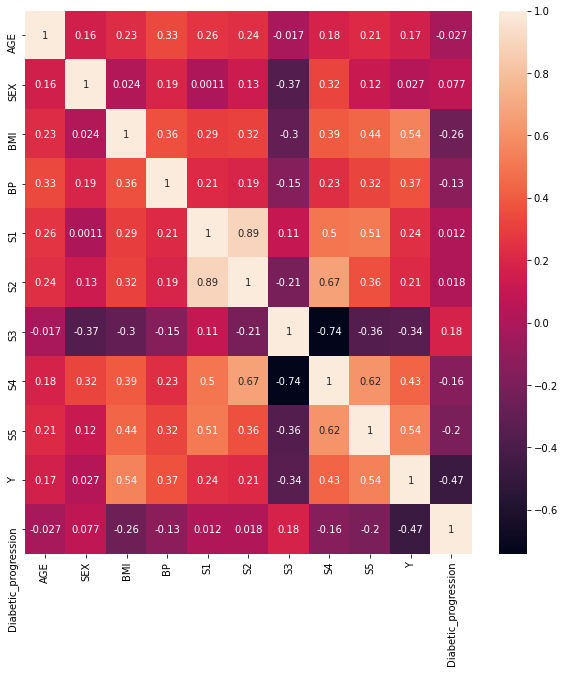

**CLASSIFICATION**

**Libraries**

In \[38\]:

    from sklearn.model_selection import train_test_split
    from sklearn.preprocessing import MinMaxScaler 
    from sklearn.metrics import accuracy_score
    from sklearn.model_selection import cross_val_score 
    from sklearn.metrics import classification_report
    from sklearn import metrics
    from sklearn.metrics import confusion_matrix
    from sklearn.metrics import make_scorer
    from sklearn.metrics import r2_score

**SUPPORT VECTOR MACHIN**E

In \[39\]:

    X=data1.iloc[:,1:-1]
    y = pd.DataFrame(data1.iloc[:,-1])

In \[40\]:

    X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=13)

In \[41\]:

    scaler = MinMaxScaler()
    scaler.fit(X_train)
    X_train = scaler.transform(X_train)
    X_test = scaler.transform(X_test)

In \[42\]:

    from sklearn import svm

    #Create a svm Classifier
    clf1 = svm.SVC(kernel = 'rbf',C= 1000, gamma = 'auto') 

    #Train the model using the training sets
    clf1.fit(X_train, y_train)

    #Predict the response for test dataset
    y_pred = clf1.predict(X_test)

In \[43\]:

    SVC1=accuracy_score(y_test, y_pred)
    print("Accuracy:",SVC1)

    Accuracy: 1.0

In \[44\]:

    from sklearn.model_selection import cross_val_score  
    print(cross_val_score(clf1,X,y,cv=5,scoring="accuracy").mean())

    0.9563829787234042

In \[45\]:

    print(classification_report(y_test,y_pred))

                  precision    recall  f1-score   support

               0       1.00      1.00      1.00        47
               1       1.00      1.00      1.00        50
               2       1.00      1.00      1.00        47
               3       1.00      1.00      1.00        44

        accuracy                           1.00       188
       macro avg       1.00      1.00      1.00       188
    weighted avg       1.00      1.00      1.00       188

In \[46\]:

    cm = metrics.confusion_matrix(y_test,y_pred)
    cm

Out\[46\]:

    array([[47,  0,  0,  0],
           [ 0, 50,  0,  0],
           [ 0,  0, 47,  0],
           [ 0,  0,  0, 44]])

In \[47\]:

    from sklearn.metrics import plot_confusion_matrix
    disp = plot_confusion_matrix(clf1,X_test,y_test,display_labels=class_names,cmap=plt.cm.Blues)
    plt.show()

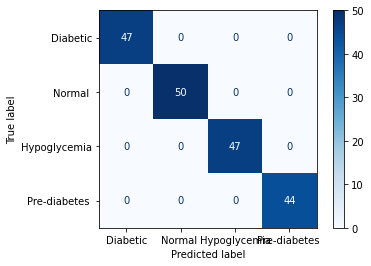

In \[48\]:

    FP = cm.sum(axis=0) - np.diag(cm) 
    FN = cm.sum(axis=1) - np.diag(cm)
    TP = np.diag(cm)
    TN = cm.sum() - (FP + FN + TP)
    FP = FP.astype(float)
    FN = FN.astype(float)
    TP = TP.astype(float)
    TN = TN.astype(float)
    print("False positive",FP)
    print("True positive",TP)
    print("False negative",FN)
    print("True negative",TN)

    False positive [0. 0. 0. 0.]
    True positive [47. 50. 47. 44.]
    False negative [0. 0. 0. 0.]
    True negative [141. 138. 141. 144.]

**RANDOM FOREST**

In \[49\]:

    X1=data1.iloc[:,1:-1]
    y1 = pd.DataFrame(data1.iloc[:,-1])

In \[50\]:

    X_train1, X_test1, y_train1, y_test1 = train_test_split(X1,y1,test_size=0.2,random_state=100)

In \[51\]:

    scaler = MinMaxScaler()
    scaler.fit(X_train1)

    X_train1 = scaler.transform(X_train1)
    X_test1 = scaler.transform(X_test1)

In \[52\]:

    from sklearn.ensemble import RandomForestClassifier 
    clf = RandomForestClassifier(n_estimators = 25)   
    clf.fit(X_train1, y_train1) 
     
    y_pred1 = clf.predict(X_test1)
    RF1=accuracy_score(y_test1, y_pred1)
    print(RF1)

    1.0

In \[53\]:

     print(cross_val_score(clf,X1,y1,cv=5,scoring="accuracy").mean())

    0.9989361702127659

In \[54\]:

    print(classification_report(y_test1,y_pred1))

                  precision    recall  f1-score   support

               0       1.00      1.00      1.00        60
               1       1.00      1.00      1.00        47
               2       1.00      1.00      1.00        44
               3       1.00      1.00      1.00        37

        accuracy                           1.00       188
       macro avg       1.00      1.00      1.00       188
    weighted avg       1.00      1.00      1.00       188

In \[55\]:

    cm1 = metrics.confusion_matrix(y_test1,y_pred1)
    cm1

Out\[55\]:

    array([[60,  0,  0,  0],
           [ 0, 47,  0,  0],
           [ 0,  0, 44,  0],
           [ 0,  0,  0, 37]])

In \[56\]:

    from sklearn.metrics import plot_confusion_matrix
    disp = plot_confusion_matrix(clf,X_test1,y_test1,display_labels=class_names,cmap=plt.cm.Blues)
    plt.show()

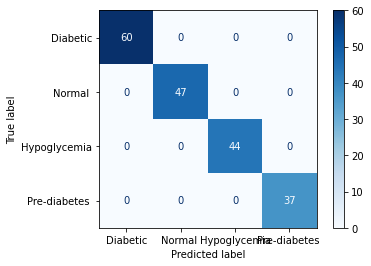

In \[57\]:

    FP1 = cm1.sum(axis=0) - np.diag(cm1) 
    FN1 = cm1.sum(axis=1) - np.diag(cm1)
    TP1 = np.diag(cm1)
    TN1 = cm1.sum() - (FP1 + FN1 + TP1)
    FP1 = FP1.astype(float)
    FN1 = FN1.astype(float)
    TP1 = TP1.astype(float)
    TN1 = TN1.astype(float)
    print("False positive",FP1)
    print("True positive",TP1)
    print("False negative",FN1)
    print("True negative",TN1)

    False positive [0. 0. 0. 0.]
    True positive [60. 47. 44. 37.]
    False negative [0. 0. 0. 0.]
    True negative [128. 141. 144. 151.]

**MULTI-LAYER PERCEPTRON**

In \[58\]:

    X2=data1.iloc[:,1:-1]
    y2= pd.DataFrame(data1.iloc[:,-1])

In \[59\]:

    X_train2, X_test2, y_train2, y_test2 = train_test_split(X2,y2,test_size=0.2,random_state=100)

In \[60\]:

    from sklearn.neural_network import MLPClassifier
    clf11 = MLPClassifier(solver='adam',hidden_layer_sizes=10,batch_size=30,max_iter=300, random_state=100,activation='tanh')
    clf11.fit(X_train2, y_train2)
    y_pred2 = clf11.predict(X_test2)
    acc_NN = accuracy_score(y_test2, y_pred2)*100
    print('Accuracy of MLP/Neural Network (%): \n',acc_NN)

    Accuracy of MLP/Neural Network (%): 
     84.04255319148936

In \[61\]:

    print(cross_val_score(clf11,X2,y2,cv=5,scoring="accuracy").mean())

    0.8

In \[62\]:

    print(classification_report(y_test2,y_pred2))

                  precision    recall  f1-score   support

               0       0.95      0.93      0.94        60
               1       0.92      0.94      0.93        47
               2       0.71      0.82      0.76        44
               3       0.73      0.59      0.66        37

        accuracy                           0.84       188
       macro avg       0.83      0.82      0.82       188
    weighted avg       0.84      0.84      0.84       188

In \[63\]:

    cm2 = metrics.confusion_matrix(y_test2,y_pred2)
    cm2

Out\[63\]:

    array([[56,  0,  0,  4],
           [ 0, 44,  3,  0],
           [ 0,  4, 36,  4],
           [ 3,  0, 12, 22]])

In \[64\]:

    from sklearn.metrics import plot_confusion_matrix
    disp = plot_confusion_matrix(clf11,X_test2,y_test2,display_labels=class_names,cmap=plt.cm.Blues)
    plt.show()

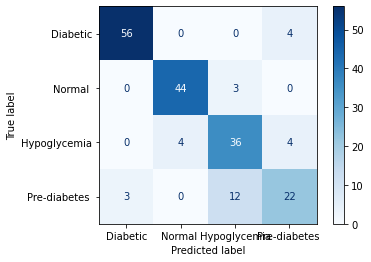

In \[65\]:

    FP2 = cm2.sum(axis=0) - np.diag(cm2) 
    FN2 = cm2.sum(axis=1) - np.diag(cm2)
    TP2 = np.diag(cm2)
    TN2 = cm2.sum() - (FP2 + FN2 + TP2)
    FP2 = FP2.astype(float)
    FN2 = FN2.astype(float)
    TP2 = TP2.astype(float)
    TN2 = TN2.astype(float)
    print("False positive",FP2)
    print("True positive",TP2)
    print("False negative",FN2)
    print("True negative",TN2)

    False positive [ 3.  4. 15.  8.]
    True positive [56. 44. 36. 22.]
    False negative [ 4.  3.  8. 15.]
    True negative [125. 137. 129. 143.]

**NAIVE BAYESIAN**

In \[66\]:

    X3=data1.iloc[:,1:-1]
    y3= pd.DataFrame(data1.iloc[:,-1])

In \[67\]:

    X_train3, X_test3, y_train3, y_test3 = train_test_split(X3,y3,test_size=0.2,random_state=100)

In \[68\]:

    from sklearn.naive_bayes import GaussianNB
    gnb = GaussianNB().fit(X_train3, y_train3)
    y_pred3 = gnb.predict(X_test3)
      

In \[69\]:

    gnb1=accuracy_score(y_test3, y_pred3)
    print(gnb1)

    0.9521276595744681

In \[70\]:

     print(cross_val_score(gnb,X3,y3,cv=5,scoring="accuracy").mean())

    0.9234042553191489

In \[71\]:

    print(classification_report(y_test3,y_pred3))

                  precision    recall  f1-score   support

               0       0.97      0.97      0.97        60
               1       0.96      0.98      0.97        47
               2       1.00      0.89      0.94        44
               3       0.88      0.97      0.92        37

        accuracy                           0.95       188
       macro avg       0.95      0.95      0.95       188
    weighted avg       0.95      0.95      0.95       188

In \[72\]:

    cm3 = metrics.confusion_matrix(y_test3,y_pred3)
    cm3

Out\[72\]:

    array([[58,  0,  0,  2],
           [ 1, 46,  0,  0],
           [ 0,  2, 39,  3],
           [ 1,  0,  0, 36]])

In \[73\]:

    from sklearn.metrics import plot_confusion_matrix
    disp = plot_confusion_matrix(gnb,X_test3,y_test3,display_labels=class_names,cmap=plt.cm.Blues)
    plt.show()

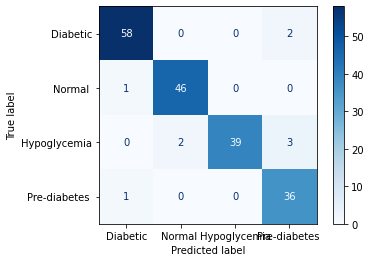

In \[74\]:

    FP3 = cm3.sum(axis=0) - np.diag(cm3) 
    FN3 = cm3.sum(axis=1) - np.diag(cm3)
    TP3 = np.diag(cm3)
    TN3 = cm3.sum() - (FP3 + FN3 + TP3)
    FP3 = FP3.astype(float)
    FN3 = FN3.astype(float)
    TP3 = TP3.astype(float)
    TN3 = TN3.astype(float)
    print("False positive",FP3)
    print("True positive",TP3)
    print("False negative",FN3)
    print("True negative",TN3)

    False positive [2. 2. 0. 5.]
    True positive [58. 46. 39. 36.]
    False negative [2. 1. 5. 1.]
    True negative [126. 139. 144. 146.]